# Homework 7 Fitting ODEs!

**You must work alone on this assignment.**




## Problem 1

Complete the final exercise where we fit a linear ODE system to fake data we generated in Lecture 8 (should already be done).

1. Copy and paste the cells from the one labeled "Step 1: create fake data" through the cell labeled "what we can learn:". 
2. Ensure that all of your code is executable and correctly reproduces the class exercise. 

# Problem 2: Analysis of a simple chemostat

A problem we've seen before :-) 

Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth{(say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

We use the following equations and info to describe the chemostat dynamics:

Let: 
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/l$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/l.
- V be the volume of the chemost stat and equal to 1$l$.
- Q be the fixed volumetric flow rate and equal to 1 $l/h$.
- q = Q/V be the dilution rate ($h^{-1}$)

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

However, we have several **unknown parameters that we need to estimate**:

- r is the growth rate of bacteria ($h^{-1}$) defined as $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$, but $K_m$ and $R_{max}$ are unknown. 
- y is the yield parameter and is also unknown. 

So we went to the lab and collected training data (file name HW7_training_data.csv). When the data was collected, the chemostat was started with a mass of bacteria = 4 gram and 0.5 g/l of nutrients in the reactor.  



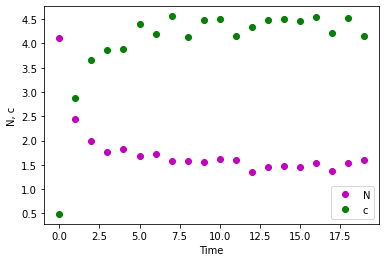

In [82]:

### The data was generated with (.43,8,2.8) as the values for y,Km,Rmax. See Homework 7 make file
# training_data = odeint(f, ic, t_steps,args= (.43,8,2.8));

# training_data[:,0] = training_data[:,0]*np.random.normal(1,0.05,len(training_data));
# training_data[:,1] = training_data[:,1]*np.random.normal(1,0.05,len(training_data));


from scipy.integrate import odeint 
from scipy.optimize import minimize

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

my_data = np.genfromtxt('HW3_training_data.csv', delimiter=',');

t_steps = my_data[1:21,0];
training_data = my_data[1:21,1:3];

plt.plot(t_steps, training_data[:,0],'o', color = 'm')
plt.plot(t_steps, training_data[:,1],'o', color = 'g')
plt.xlabel("Time")
plt.ylabel("N, c")
plt.legend(['N', 'c'])

# Below, write the function to define the RMSE.

**Be sure to test some values**


In [83]:
def f(x,t,y,Km,Rmax):
    V = 1;
    Q = 1;
    q = Q/V;
    
    c0 = 8;
    
    N = x[0];
    c = x[1];
    r = Rmax*c/(Km+c);
    
    return np.array([r*N-q*N,q*c0-q*c-(1/y)*r*N])



ic = [4,.5]


def RMSE(params):
    a, b, c = params;
    ODE_output = odeint(f, ic, t_steps, args = (a,b,c));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

RMSE([.25,4,2])

3.5884481181886243

# Now use minimize to estimate parameters.

- Since we have no other information, use (a,b,c) = (1,1,1) as a first guess.
- Once successful, plot the results.
- Then, re run your routine but instead of taking steps size of .5, take step sizes of 10. What happens?

      fun: 0.7802279930999247
 hess_inv: array([[ 3.54446303e-03, -5.86619611e-02, -1.52409639e-02],
       [-5.86619611e-02,  1.38553199e+02,  3.17999426e+01],
       [-1.52409639e-02,  3.17999426e+01,  7.31775478e+00]])
      jac: array([-2.68220901e-07, -5.28991222e-07,  1.89244747e-06])
  message: 'Optimization terminated successfully.'
     nfev: 152
      nit: 19
     njev: 38
   status: 0
  success: True
        x: array([ 0.42661789, 13.4882271 ,  4.06918178])


0.0011812222011812813

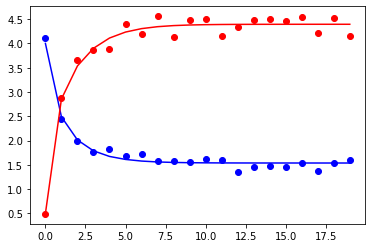

In [84]:
sol = minimize(RMSE, x0 = (.1,8,2));
print(sol);

# collect prediction or fitted output
y,Km,Rmax = sol.x
fitted_output = odeint(f, ic, t_steps, args = (y,Km,Rmax));


plt.plot(t_steps, training_data[:,0], 'bo');
plt.plot(t_steps, fitted_output[:,0], 'b');
plt.plot(t_steps, training_data[:,1], 'ro');
plt.plot(t_steps, fitted_output[:,1], 'r');

RMSE((.43,8,2.8))
#np.savetxt("training_data.csv",training_data,delimiter=",")

a,b,c = sol.x
residuals = training_data - odeint(f, ic, t_steps, args = (a,b,c));
np.mean(residuals)

In [85]:
def RMSE(params):
    a, b, c = params;
    ODE_output = odeint(f, ic, t_steps, args = (a,b,c));
    err_n = (training_data[:,0] - ODE_output[:,0])/1.5;
    err_c = (training_data[:,1] - ODE_output[:,1])/4.5;
    return np.sqrt(np.sum(err_n**2)+np.sum(err_c**2)) 

sol = minimize(RMSE, x0 = (.1,8,2));
print(sol);



      fun: 0.3036475166414186
 hess_inv: array([[ 7.45108760e-03, -2.56459284e-01, -7.88366609e-02],
       [-2.56459284e-01,  1.80837273e+03,  4.14579720e+02],
       [-7.88366609e-02,  4.14579720e+02,  9.51386953e+01]])
      jac: array([ 4.75347042e-06, -2.79396772e-07,  1.45658851e-06])
  message: 'Optimization terminated successfully.'
     nfev: 148
      nit: 24
     njev: 37
   status: 0
  success: True
        x: array([0.42727418, 9.9258852 , 3.24666028])


In [86]:
# Let's fix the value of y and then calculate the RMSE for several different values of K and Rmax. We can then use a heatmap
# to illustrate how our error changes for these two parameters.

y = 0.43
K = np.linspace(1,15,100);
Rmax = np.linspace(1,8,100);

# Get all combinations of the parameters.
all_combinations = np.array(np.meshgrid(y,K,Rmax,)).T.reshape(-1,3)
N = len(all_combinations);

# Get RMSE for each combination
output = np.zeros(N);
for m in np.arange(0,N,1):
    output[m] = RMSE(all_combinations[m,:])

<AxesSubplot:xlabel='Rmax', ylabel='K'>

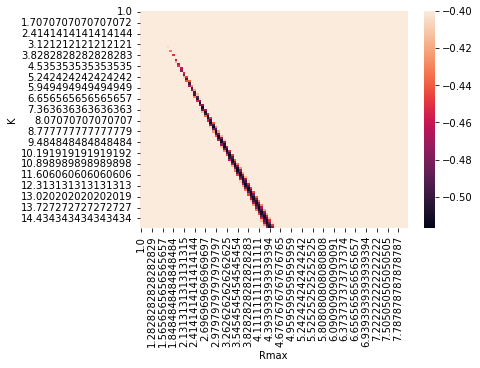

In [91]:
import seaborn as sns
import pandas as pd

dat = pd.DataFrame(data = {"K": all_combinations[:,1], "Rmax": all_combinations[:,2], "RMSE": np.log10(output)})

dat.head()

pivotted= dat.pivot('K','Rmax','RMSE')

sns.heatmap(pivotted, vmax = -.4)

# # dat = pd.DataFrame(data = output.T.reshape((100,100)),index = K, columns = Rmax)
# dat = pd.DataFrame(data = output.reshape((100,100)),index = np.round_(K)[::-1], columns = np.round_(Rmax))
# sns.heatmap(dat,vmax=.1)
# # Generate heatmap
# x = all_combinations[:,1]; # K values
# z = all_combinations[:,2]; # Rmax values


# plt.img()


# # Set up a regular grid of interpolation points
# xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
# xi, yi = np.meshgrid(xi, yi)

# # Interpolate
# rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
# zi = rbf(xi, yi)

# plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
#            extent=[x.min(), x.max(), y.min(), y.max()])
# # plt.scatter(x, y, c=z)
# plt.colorbar()
# plt.show()

# Plot the surface.
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(xi, yi, zi,linewidth=0, antialiased=False)

# fig, ax = plt.subplots()
# plt.contourf(xi, yi, zi,20,cmap='RdGy');
# plt.colorbar();